### log-rank检验

In [ ]:
# log-rank检验
# https://www.sohu.com/a/311943302_655370

# 统计学中的显著性水平α和P值
# https://zhuanlan.zhihu.com/p/56663036

# log-rank时序检验 （百度文库）
# https://wenku.baidu.com/view/89bf177c33687e21ae45a929.html

# 生存率曲线间的显著性测定_Logrank检验法（百度文库）
# https://wenku.baidu.com/view/8c356b75915f804d2a16c151.html

# 统计学中各种检验以及python实现(卡方检验原理)
# https://blog.csdn.net/bxy5511/article/details/81508262

In [1]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

In [2]:
data_x, data_y = load_veterans_lung_cancer()
display(data_x)
display(data_y)

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
5,49.0,squamous,20.0,5.0,no,standard
6,69.0,squamous,40.0,10.0,yes,standard
7,68.0,squamous,80.0,29.0,no,standard
8,43.0,squamous,50.0,18.0,no,standard
9,70.0,squamous,70.0,6.0,no,standard


array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [4]:
group_indicator = data_x.loc[:, "Celltype"]
groups = group_indicator.unique()
groups

[squamous, smallcell, adeno, large]
Categories (4, object): [squamous, smallcell, adeno, large]

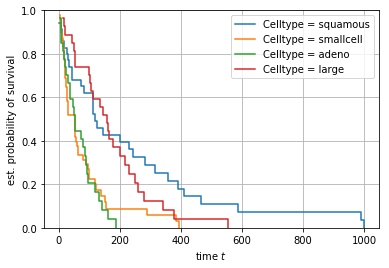

In [5]:
for group in groups:
    group_y = data_y[group_indicator == group]
    time, surv_prob = kaplan_meier_estimator(group_y["Status"],group_y["Survival_in_days"])

    plt.step(time, surv_prob, where="post",label="Celltype = {}".format(group))
    plt.xlabel("time $t$")
    plt.ylabel("est. probability of survival")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()

### compare_survival()
https://scikit-survival.readthedocs.io/en/latest/generated/sksurv.compare.compare_survival.html#sksurv.compare.compare_survival

In [6]:
from sksurv.compare import compare_survival

In [7]:
chisq, pvalue, stats, covar = compare_survival(data_y, group_indicator, return_stats=True)
display(chisq)
display(pvalue)
display(stats)
display(covar)

25.40370034578536

1.271245939006091e-05

,counts,observed,expected,statistic
group,,,,
adeno,27,26,15.693765,10.306235
large,27,26,34.549478,-8.549478
smallcell,48,45,30.102079,14.897921
squamous,35,31,47.654678,-16.654678


array([[ 12.96617006,  -4.07011754,  -4.4087293 ,  -4.48732321],
       [ -4.07011754,  24.19903529,  -7.81168662, -12.31723113],
       [ -4.4087293 ,  -7.81168662,  21.75426794,  -9.53385202],
       [ -4.48732321, -12.31723113,  -9.53385202,  26.33840637]])